In [1]:
#Import primary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load PimaDiabetes.csv as df
df = pd.read_csv('PimaDiabetes.csv')

# Exclude 'Outcome' column
df = df.drop('Outcome', axis=1)

# Head of the Data

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Dataset Info

In [3]:
df.info()
print("Length of row is :", len(df.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 47.0 KB
Length of row is : 750


# Summary Statistics

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Data Imputation and Removal
### Zero/Error Values Handling

In [5]:
#Removing 0 from Insulin and SkinThickness as the 0 values is too many, tried using imputation but the numbers are spiking 
# around the values chosen (median, mode, or mean)

df = df[(df['SkinThickness'] != 0) & (df['Insulin'] != 0)]

In [6]:
from sklearn.impute import SimpleImputer
mean_columns = ['Glucose', 'BloodPressure', 'BMI']

# Create simpleimputers
mean_imputer = SimpleImputer(missing_values=0, strategy='mean')

# Apply the imputer
for column in mean_columns:
    df[column] = mean_imputer.fit_transform(df[column].values.reshape(-1, 1))


In [7]:
#See the summary statistics after data imputation and removal
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,3.288660,122.604651,70.561856,28.992268,155.371134,33.052196,0.526655,30.760309
std,3.205966,30.807249,12.478562,10.484020,117.993415,7.028717,0.350231,10.127700
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.375000,0.279750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.452000,27.000000
75%,5.000000,143.000000,78.000000,36.000000,190.000000,37.025000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


# Combined plots of Rug plot (lossless), Histogram (lossy), Kernel Density Estimate (KDE, lossy), and vertical line of Mean and Median of each PimaDiabetes.csv (except Outcome) variables.

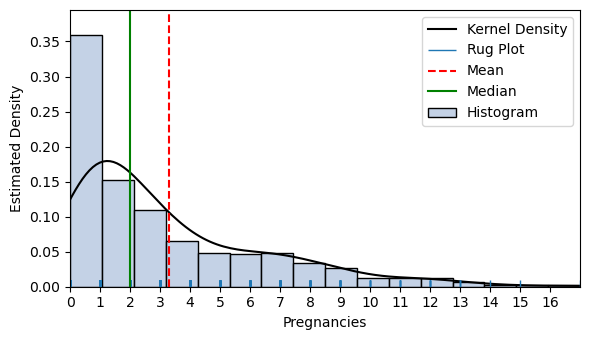

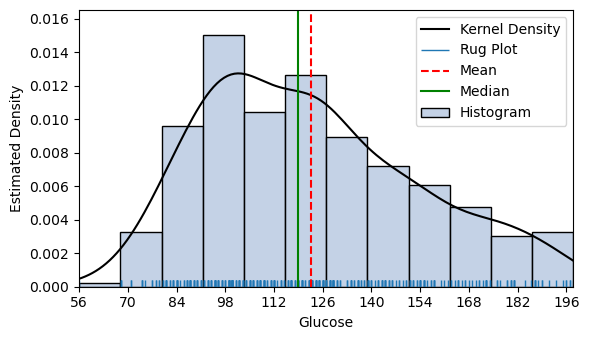

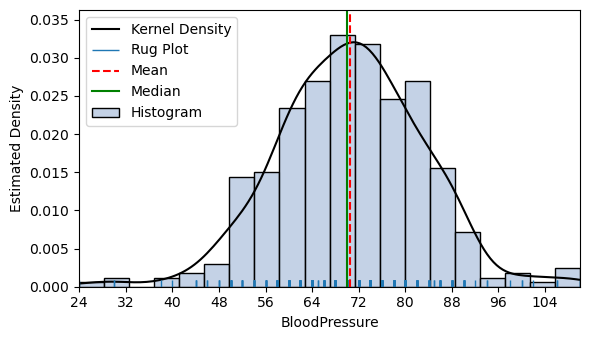

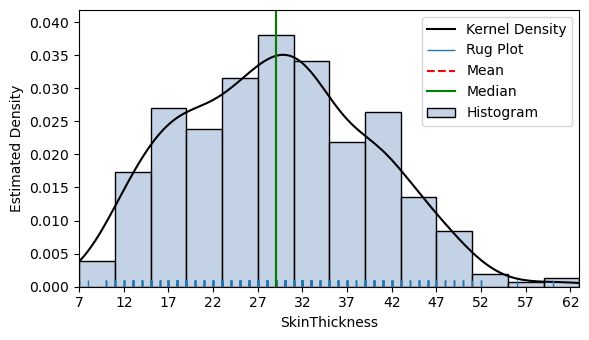

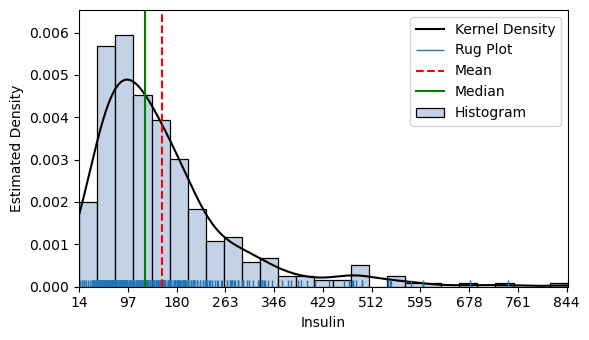

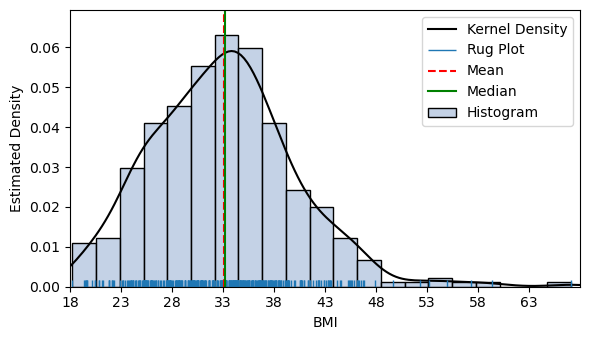

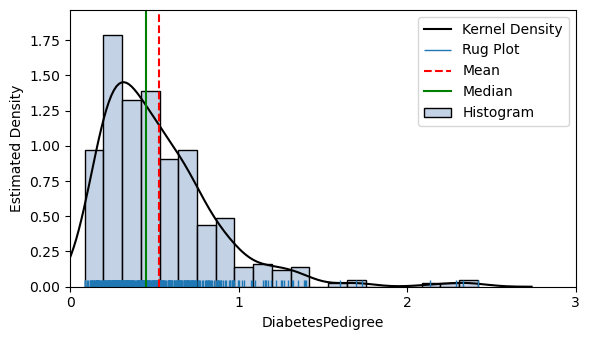

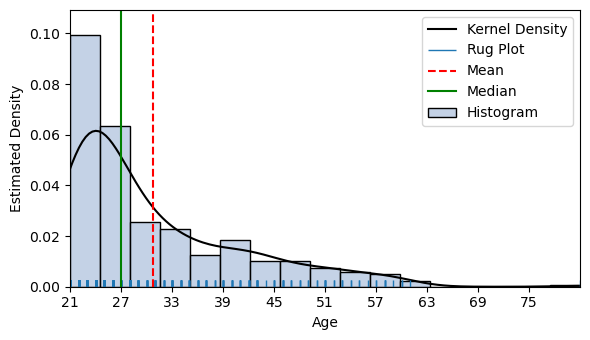

In [8]:
import numpy as np
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
widthInInches = 6
heightInInches = 3.5
versionStrParts = sns.__version__.split('.')

# Looping the plots
for column in columns:
    plt.figure(figsize=(widthInInches, heightInInches))

    values = df[column].values

    if int(versionStrParts[1]) < 11:
        kdeAxes = sns.distplot(values,
                               kde_kws={"label": "Kernel Density", "color": "black"},
                               hist_kws={"label": "Histogram", "color": 'lightsteelblue'})
    else:
        kdeAxes = sns.kdeplot(values, color="black", label="Kernel Density")
        sns.histplot(values, stat="density", color="lightsteelblue", label="Histogram")

    # Rug plot
    sns.rugplot(values, label="Rug Plot")

    # Labels
    plt.xlabel(column)
    plt.ylabel('Estimated Density')

    min_val = int(np.floor(min(values)))
    max_val = int(np.ceil(max(values)))
    
    if max_val - min_val > 10:
        step_size = int((max_val - min_val) / 10)  
        plt.xticks(range(min_val, max_val, step_size))
        plt.xlim([min_val, max_val])
    else:
        plt.xticks(range(min_val, max_val + 1))
        plt.xlim([min_val, max_val])

    # Calculate mean and median
    mean_value = np.mean(values)
    median_value = np.median(values)

    # Mean & Median plot
    plt.axvline(mean_value, color='r', linestyle='--', label='Mean')
    plt.axvline(median_value, color='g', linestyle='-', label='Median')

    plt.legend()
    plt.tight_layout()
plt.show()


# Combined plots of quantiles and ECDF multiplied by 100% of each PimaDiabetes.csv (except Outcome) variables.

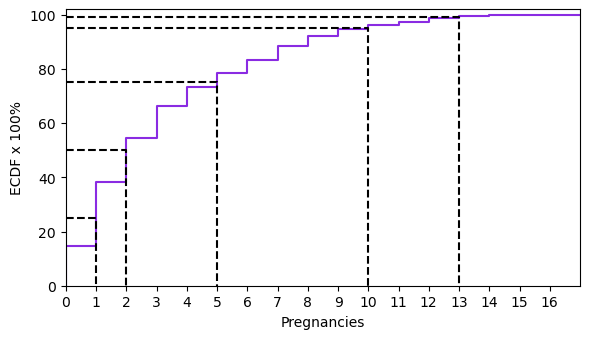

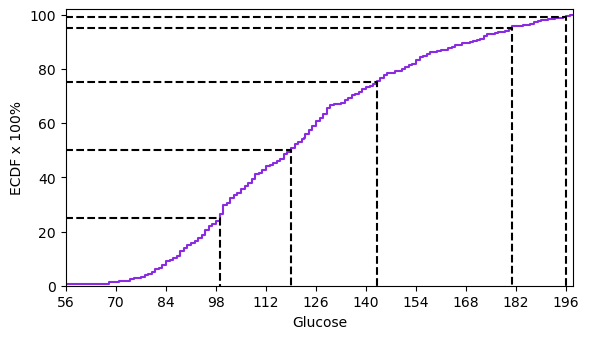

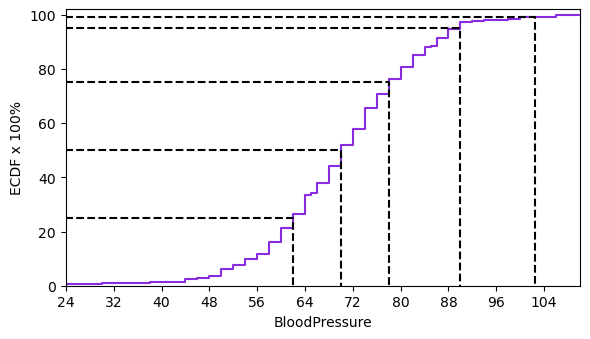

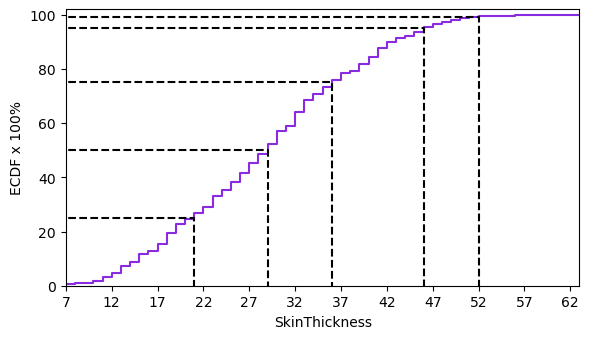

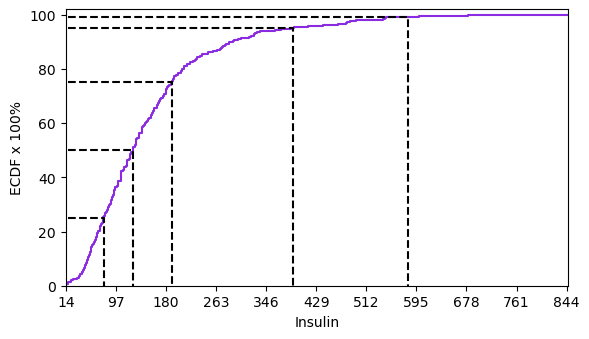

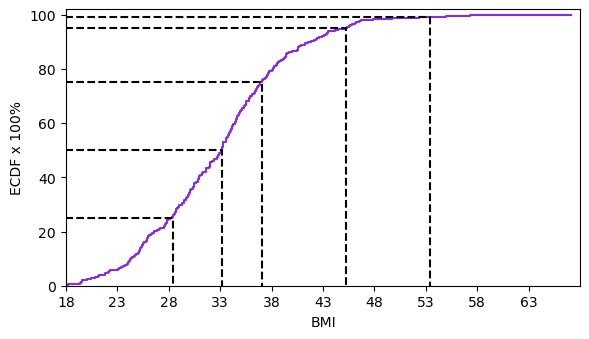

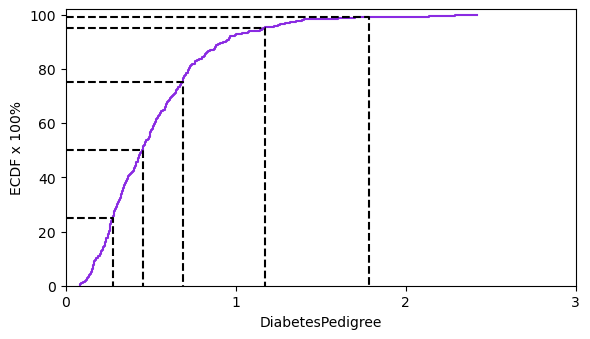

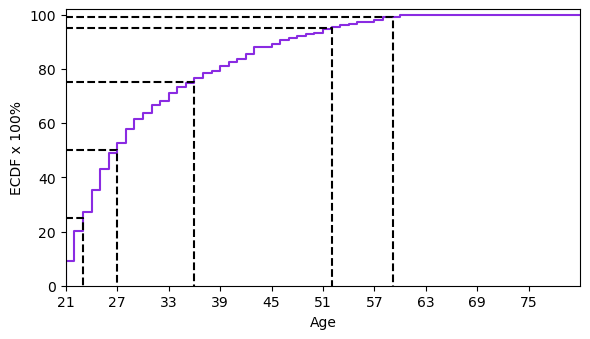

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

# Loop 
for column in columns:
    plt.figure(figsize=(widthInInches, heightInInches))

    values = df[column].values

    # ECDF Value
    ecdf = ECDF(values)

    # Calculate quantiles
    p25 = np.percentile(values, 25)
    p50 = np.percentile(values, 50)
    p75 = np.percentile(values, 75)
    p95 = np.percentile(values, 95)
    p99 = np.percentile(values, 99)

    # ECDF Settings
    plt.step(ecdf.x, 100*ecdf.y, color='blueviolet')

    
    plt.plot([0, p25, p25], [25, 25, 0], '--k')
    plt.plot([0, p50, p50], [50, 50, 0], '--k')
    plt.plot([0, p75, p75], [75, 75, 0], '--k')
    plt.plot([0, p95, p95], [95, 95, 0], '--k')
    plt.plot([0, p99, p99], [99, 99, 0], '--k')

    # Add labels
    plt.xlabel(column)
    plt.ylabel('ECDF x 100%')
    
    min_val = int(np.floor(min(values)))
    max_val = int(np.ceil(max(values)))
    
    if max_val - min_val > 10:
        step_size = int((max_val - min_val) / 10)  
        plt.xticks(range(min_val, max_val, step_size))
        plt.xlim([min_val, max_val])
        plt.ylim([0,102])
    else:
        plt.xticks(range(min_val, max_val + 1))
        plt.xlim([min_val, max_val])
        plt.ylim([0,102])

    plt.tight_layout()   
plt.show()


# Combined density estimates using the uniform and gaussian kernels of each PimaDiabetes.csv (except Outcome) variables

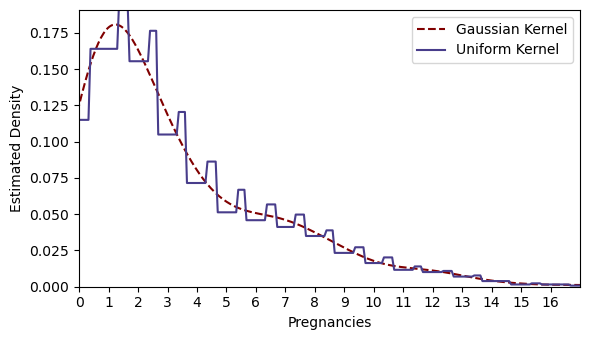

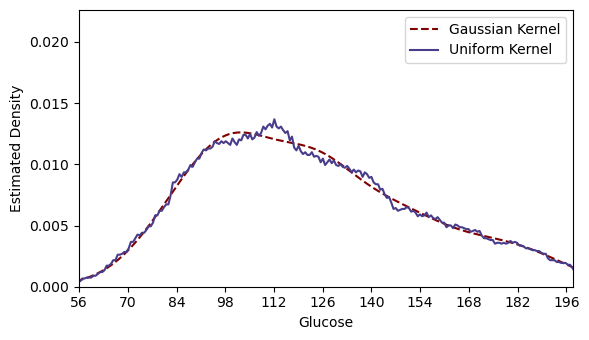

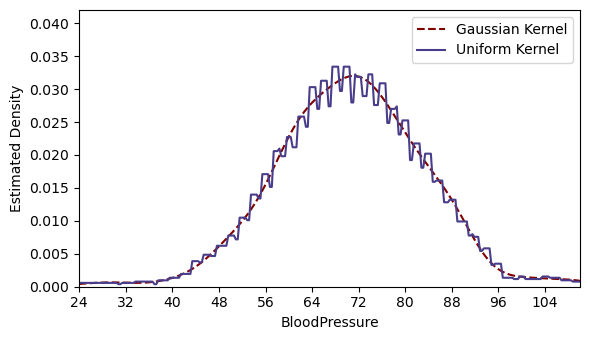

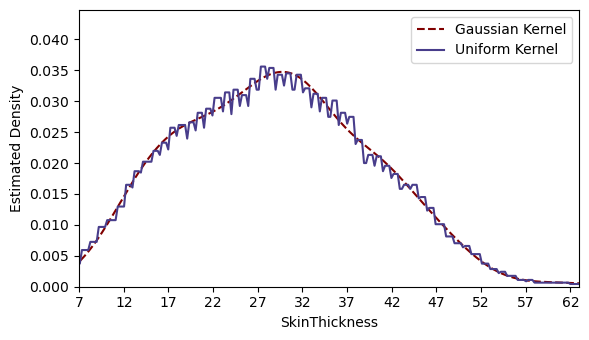

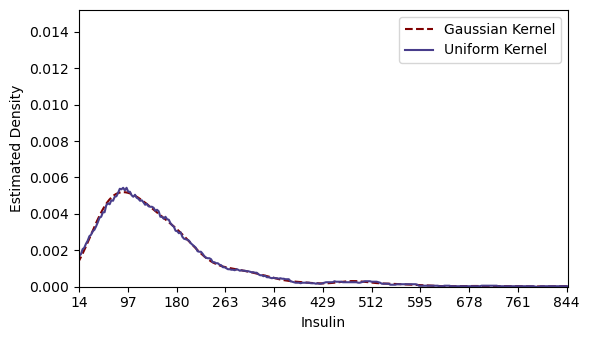

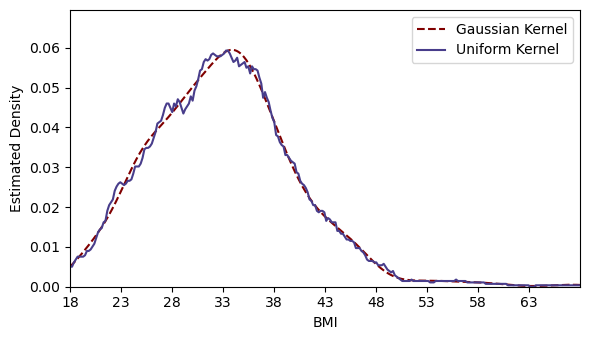

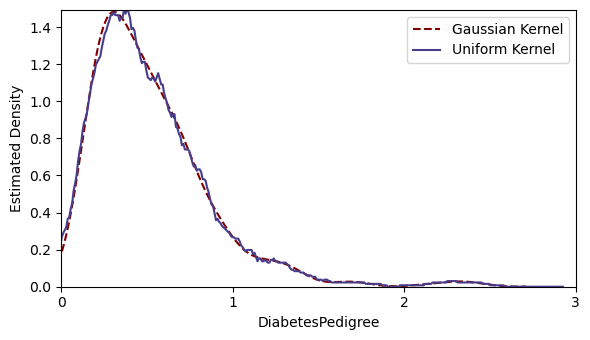

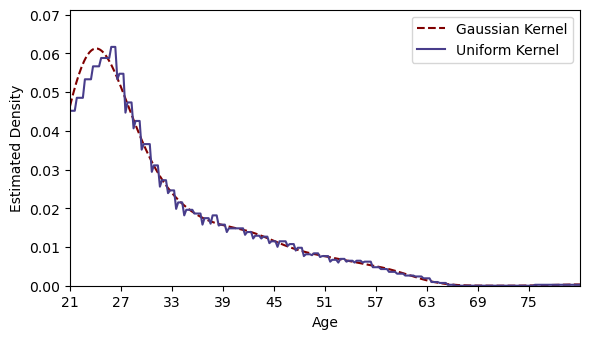

In [10]:
import statsmodels.api as sm

# Loop 
for column in columns:
    
    plt.figure(figsize=(widthInInches, heightInInches))

    values = df[column].values

    # Uniform (box-shaped) kernel
    mykde = sm.nonparametric.KDEUnivariate(values)
    mykde.fit(kernel="uni", fft=False)
    xuni = mykde.support
    yuni = mykde.density

    # Gaussian kernel
    mykde2 = sm.nonparametric.KDEUnivariate(values)
    mykde2.fit(kernel="gau")
    xgau = mykde2.support
    ygau = mykde2.density

    # Plot the two kernels
    plt.plot(xgau, ygau, label='Gaussian Kernel', color='maroon', linestyle='--')
    plt.plot(xuni, yuni, label='Uniform Kernel', color='darkslateblue', linestyle='-')

    # Add labels
    plt.xlabel(column)
    plt.ylabel('Estimated Density')
    
    min_val = int(np.floor(min(values)))
    max_val = int(np.ceil(max(values)))
    
    if max_val - min_val > 10:
        step_size = int((max_val - min_val) / 10)  
        plt.xticks(range(min_val, max_val, step_size))
        plt.xlim([min_val, max_val])
        plt.ylim([0, max(ygau) + 0.01])  
    else:
        plt.xticks(range(min_val, max_val + 1))
        plt.xlim([min_val, max_val])
        plt.ylim([0, max(ygau) + 0.01])  

    plt.legend()
    
    plt.tight_layout()

     
plt.show()


# Multivariate Data Analysis 


# Linear Model and Correlation between each Variables to 'Outcome'

In [11]:
df_original = pd.read_csv('PimaDiabetes.csv')

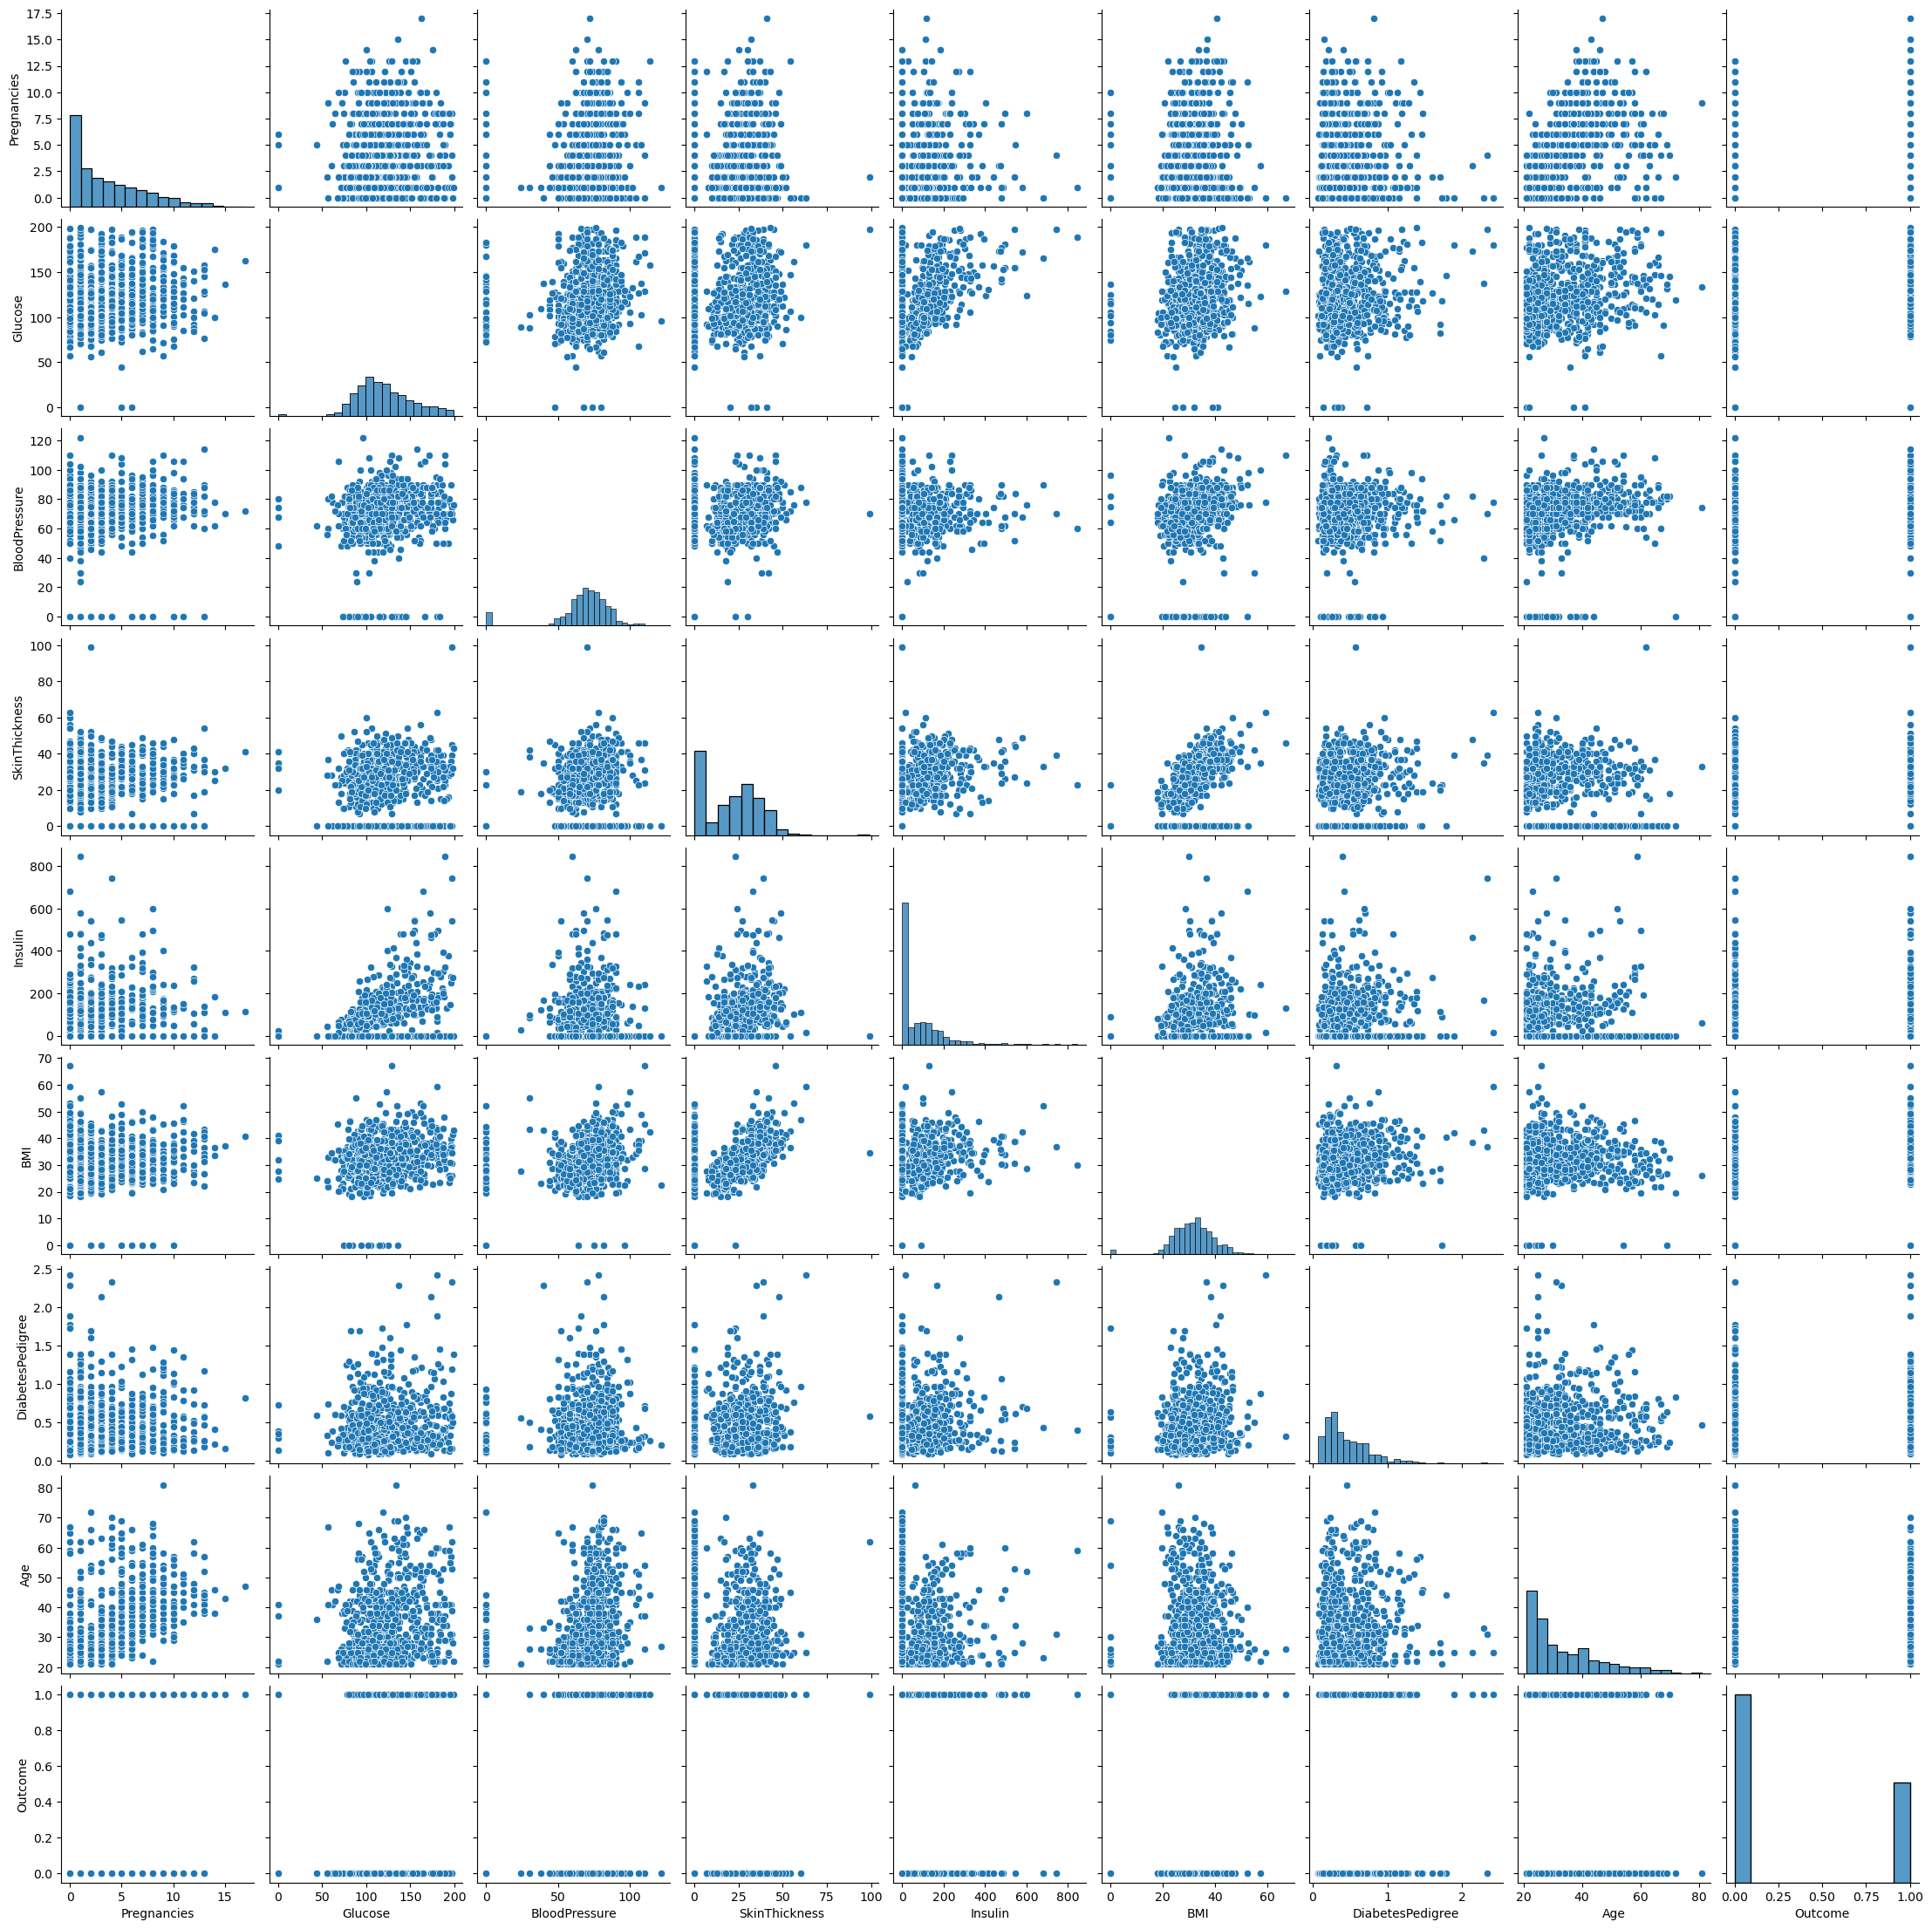

In [12]:
#Pairplot
sns.pairplot(df_original)

In [13]:
import statsmodels.formula.api as smf

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']

#Loop
for var in variables:
    formula = f'Outcome ~ {var}'
    model = smf.ols(formula=formula, data=df_original).fit()
    print(f'\nSummary for variable {var}:')
    print(model.summary())



Summary for variable Pregnancies:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     41.49
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.12e-10
Time:                        13:21:54   Log-Likelihood:                -487.06
No. Observations:                 750   AIC:                             978.1
Df Residuals:                     748   BIC:                             987.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      

In [14]:
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']

correlations = {}

#Loop
for var in variables:
    correlations[var] = df_original[var].corr(df_original['Outcome'])

# Sort the correlations from highest to lowest
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

for var, corr in sorted_correlations:
    print(f'Correlation of {var} with Outcome: {corr}')


Correlation of Glucose with Outcome: 0.46030993500130307
Correlation of BMI with Outcome: 0.289831696615122
Correlation of Age with Outcome: 0.23289168318538497
Correlation of Pregnancies with Outcome: 0.2292346741958749
Correlation of DiabetesPedigree with Outcome: 0.17068833814035475
Correlation of Insulin with Outcome: 0.13092845050409388
Correlation of SkinThickness with Outcome: 0.08220532372704004
Correlation of BloodPressure with Outcome: 0.060860342401823815


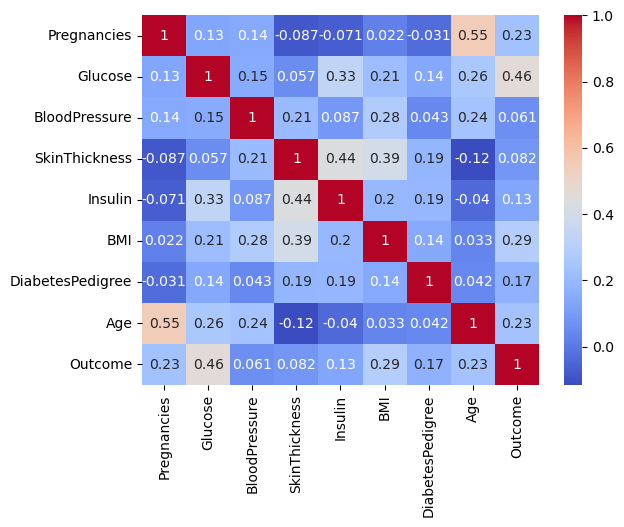

In [15]:
corr_plot = df_original.corr()
sns.heatmap(corr_plot, annot=True, cmap='coolwarm')
plt.show()


# Adding 'SevenOrMorePregnancies' Column 

In [16]:
# Add a new column "SevenOrMorePregnancies" 
df_original['SevenOrMorePregnancies'] = df_original['Pregnancies'].apply(lambda x: 1 if x >= 7 else 0)

In [17]:
df_original

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,SevenOrMorePregnancies
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0,1
746,1,147,94,41,0,49.3,0.358,27,1,0
747,1,81,74,41,57,46.3,1.096,32,0,0
748,3,187,70,22,200,36.4,0.408,36,1,0


# Fitting Logistic Regression of 'Outcome' to the 'SevenOrMorePregnancies'

In [18]:
# Fit a logistic regression model
model = smf.logit(formula='Outcome ~ SevenOrMorePregnancies', data=df_original).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.616518
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  750
Model:                          Logit   Df Residuals:                      748
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                 0.04469
Time:                        13:21:55   Log-Likelihood:                -462.39
converged:                       True   LL-Null:                       -484.02
Covariance Type:            nonrobust   LLR p-value:                 4.791e-11
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.9199      0.092    -10.052      0.000      -1.099      

# Probability of getting diabetes given six or fewer children

In [19]:
# Calculate the probabilities of getting diabetes given six or fewer pregnancies
df_six_or_fewer = df_original[df_original['Pregnancies'] <= 6]
X_six_or_fewer = df_six_or_fewer[['SevenOrMorePregnancies']]
prob_six_or_fewer = model.predict(X_six_or_fewer)
print(f'Probability of getting diabetes given six or fewer pregnancies: {prob_six_or_fewer.mean()}')

Probability of getting diabetes given six or fewer pregnancies: 0.2849829351535837


# Probability of getting diabetes given seven or more children

In [20]:
# Calculate the probabilities of getting diabetes given seven or more pregnancies
df_seven_or_more = df_original[df_original['Pregnancies'] >= 7]
X_seven_or_more = df_seven_or_more[['SevenOrMorePregnancies']]
prob_seven_or_more = model.predict(X_seven_or_more)
print(f'Probability of getting diabetes given seven or more pregnancies: {prob_seven_or_more.mean()}')

Probability of getting diabetes given seven or more pregnancies: 0.5670731707317076


# Model Comparison, Evaluation, and Selection 

## 1. Model-1 Glucose and BMI

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


X1 = df_original[['Glucose','BMI']]
y1 = df_original['Outcome']

# Splitting, test size 20% and random 42
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# logisticregression as model1
model1 = LogisticRegression()

# fit to model1
model1.fit(X_train, y_train)

# Predictions
predictions1 = model1.predict(X_test)

# Performance Evaluation using accuracy, recall, precision, and F1
accuracy1 = accuracy_score(y_test, predictions1)
recall1 = recall_score(y_test, predictions1)
precision1 = precision_score(y_test, predictions1)
f11 = f1_score(y_test, predictions1)

print(f'Accuracy Model-1: {accuracy1}')
print(f'Recall Model-1: {recall1}')
print(f'Precision Model-1: {precision1}')
print(f'F1 Score Model-1: {f11}')


Accuracy Model-1: 0.7866666666666666
Recall Model-1: 0.6521739130434783
Precision Model-1: 0.6521739130434783
F1 Score Model-1: 0.6521739130434783


## 2. Model-2 Glucose and Insulin

In [22]:
#Repeat the process as Model-1, but change the function name

X2 = df_original[['Glucose','Insulin']]
y2 = df_original['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LogisticRegression()

model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, predictions2)
recall2 = recall_score(y_test, predictions2)
precision2 = precision_score(y_test, predictions2)
f12 = f1_score(y_test, predictions2)

print(f'Accuracy Model-2: {accuracy2}')
print(f'Recall Model-2: {recall2}')
print(f'Precision Model-2: {precision2}')
print(f'F1 Score Model-2: {f12}')

Accuracy Model-2: 0.7333333333333333
Recall Model-2: 0.4782608695652174
Precision Model-2: 0.5789473684210527
F1 Score Model-2: 0.5238095238095238


## 3. Model-3 Glucose and Age

In [23]:
#Repeat the process as Model-1, but change the function name

X3 = df_original[['Glucose','Age']]
y3 = df_original['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LogisticRegression()

model3.fit(X_train, y_train)

predictions3 = model3.predict(X_test)

accuracy3 = accuracy_score(y_test, predictions3)
recall3 = recall_score(y_test, predictions3)
precision3 = precision_score(y_test, predictions3)
f13 = f1_score(y_test, predictions3)

print(f'Accuracy Model-3: {accuracy3}')
print(f'Recall Model-3: {recall3}')
print(f'Precision Model-3: {precision3}')
print(f'F1 Score Model-3: {f13}')

Accuracy Model-3: 0.76
Recall Model-3: 0.4782608695652174
Precision Model-3: 0.6470588235294118
F1 Score Model-3: 0.55


### Model-1 Glucose and BMI is chosen as having the best performance evaluation !

# Next, applying the Model-1 to the ToPredict.csv

In [24]:
# Load the new dataset
df_to_predict = pd.read_csv('ToPredict.csv')

X_new = df_to_predict[['Glucose','BMI']]


Prediction_ToPredict= model1.predict(X_new)

# Add the predictions as a new column 'Predicted_Outcome' to the df
df_to_predict['Outcome'] = Prediction_ToPredict

df_to_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,4,136,70,0,0,31.2,1.182,22,0
1,1,121,78,39,74,39.0,0.261,28,0
2,3,108,62,24,0,26.0,0.223,25,0
3,0,181,88,44,510,43.3,0.222,26,1
4,8,154,78,32,0,32.4,0.443,45,1


# Add Column 'SevenOrMorePregnancies'

In [25]:
# Add a new column "SevenOrMorePregnancies" 
df_to_predict['SevenOrMorePregnancies'] = df_to_predict['Pregnancies'].apply(lambda x: 1 if x >= 7 else 0)
df_to_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,SevenOrMorePregnancies
0,4,136,70,0,0,31.2,1.182,22,0,0
1,1,121,78,39,74,39.0,0.261,28,0,0
2,3,108,62,24,0,26.0,0.223,25,0,0
3,0,181,88,44,510,43.3,0.222,26,1,0
4,8,154,78,32,0,32.4,0.443,45,1,1


In [26]:
# Fit a logistic regression model
model4 = smf.logit(formula='Outcome ~ SevenOrMorePregnancies', data=df_to_predict).fit()

print(model4.summary())

         Current function value: 0.449868
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.3316
Time:                        13:21:55   Log-Likelihood:                -2.2493
converged:                      False   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.1352
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0986      1.155     -0.951      0.341      -3.362       1.165
SevenOrMorePregnancies    23.

c:\Users\Bagus Pranata\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
# Calculate the probabilities of getting diabetes given six or fewer children
df_six_or_fewer = df_to_predict[df_to_predict['Pregnancies'] <= 6]
X_six_or_fewer = df_six_or_fewer[['SevenOrMorePregnancies']]
prob_six_or_fewer = model4.predict(X_six_or_fewer)
print(f'Probability of getting diabetes given six or fewer pregnancies: {prob_six_or_fewer.mean()}')

Probability of getting diabetes given six or fewer pregnancies: 0.24999999979479076


In [28]:
# Calculate the probabilities of getting diabetes given seven or more children
df_seven_or_more = df_to_predict[df_to_predict['Pregnancies'] >= 7]
X_seven_or_more = df_seven_or_more[['SevenOrMorePregnancies']]
prob_seven_or_more = model4.predict(X_seven_or_more)
print(f'Probability of getting diabetes given seven or more pregnancies: {prob_seven_or_more.mean()}')

Probability of getting diabetes given seven or more pregnancies: 0.9999999997522737
